In [3]:
import serial
import pyaudio
import numpy as np
import wave
import scipy.signal as signal
import warnings
warnings.filterwarnings('ignore')
import sys

In [4]:
def serial_init(speed):
    dev = serial.Serial(
        # Здесь указывается устройство, с которым будет производится работа
        # /dev/ttyUSBx - для Linux
        # /dev/tty.SLAB_USBtoUART - для MacOS
        port='/dev/ttyUSB0', 
        # Скорость передачи
        baudrate=speed,
        # Использование бита четности
        parity=serial.PARITY_NONE,
        # Длина стоп-бита
        stopbits=serial.STOPBITS_ONE,
        # Длина пакета
        bytesize=serial.EIGHTBITS,
        # Максимальное время ожидания устройства
        timeout=0.01
    )
    return dev

def serial_recv(dev):
    # Для простоты макс. кол-во символов для чтения - 255. Время ожидания - 0.1
    # decode необходим для конвертирования набора полученных байтов в строку
    string = dev.read(255).decode()
    return string

def serial_send(dev, string):
    # encode конвертирует строку в кодировке utf-8 в набор байтов 
    dev.write(string.encode('utf-8'))


In [5]:
dev = serial_init(115200)
#serial_send(dev, '6')
state = serial_recv(dev)
new = serial_recv(dev)
print(state)
print(new)
#serial_send(dev, '2024')
#serial_send(dev, '123')

#serial_send(dev, '0934')
#print(state)

In [22]:
dev = serial_init(115200)
#state[0] = 0
state = 0
list = []
#new = serial_recv(dev)
while ( not state):
    state = dev.readline()
    print (state)
    value = state.decode("utf-8")
    print (value, ' ')
    if (value is not '*'): 
        list.append(value)
    else: break

    #state = dev.read
#print (state)    
#state = [int(x.decode("utf-8")) for x in state]

#str = state[0].decode("utf-8") 
#print (type(int(str)))
#state = int(state)
print (list)
print (type(state[0]))

b''
  
b''
  
b''
  
b'6,17,-1\n'
6,17,-1
  
['', '', '', '6,17,-1\n']
<class 'int'>


In [44]:
dev = serial_init(115200)
#state[0] = 0
state = 0
list = []
#new = serial_recv(dev)
x = 0
i = 0;
while (i < 5):
    while (True):
        x = dev.readline()
        y = dev.readline()
        z = dev.readline()   
        state = dev.read()
        if (state == '*'): break    

    print (x, y, z) 
    i+=1

#state = dev.read
#print (state)    
#state = [int(x.decode("utf-8")) for x in state]

#str = state[0].decode("utf-8") 
#print (type(int(str)))
#state = int(state)

#print (type(state[0]))

SerialException: [Errno 2] could not open port /dev/ttyUSB1: [Errno 2] No such file or directory: '/dev/ttyUSB1'

<IPython.core.display.Javascript object>


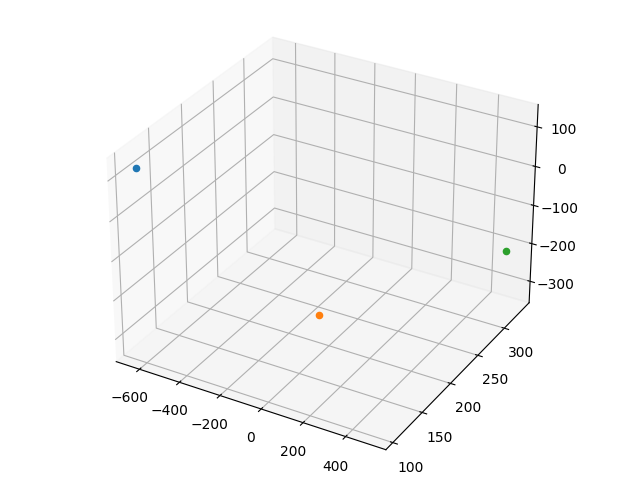

[-635, 105, 123]
[-111, 222, -325]
[503, 332, -210]
OK


In [190]:
###################
# // MAIN PROGRAM #
###################

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = Axes3D(fig, auto_add_to_figure=False)

#ax = fig.add_subplot(111, projection='3d')

fig.add_axes(ax)

dev = serial_init(115200)

coord = []
'''
while True:
    state = dev.read()
    if (state == b'*'): break
    #print (state)
'''    
while True:
    symbol = dev.read()
    if (symbol == b'*'):
        for i in range(3):
            state = dev.readline()
            line = state.decode("utf-8")

            if (line == ''): 
                print("OK")
                break
            #if (line == ''): continue
            coord.append(int(line))
    else: continue
        
    if (line == ''): break 
        
    ax.scatter(coord[0], coord[1], coord[2])
    plt.show()

    print(coord)
    
    coord.clear()
    
    
   
#print ('state = ', state[0])
#coord = [int(x.decode("utf-8")) for x in state]
#print (coord[0])
#ax.scatter(coord[0], coord[1], coord[2])

plt.show()

#print (state)
#print ('coord = ', coord)
/#print (type(state[0]))


In [21]:
# NO: timeout >= 0.01

dev = serial_init(115200)

coord = []
#new = serial_recv(dev)
'''
while True:
    state = dev.read()
    if (state == b'*'): break
    #print (state)
'''    
    
while True:
    symbol = dev.read()
    if (symbol == b'*'):  
        for i in range(3):
            state = dev.readline()
            line = state.decode("utf-8")

            if (line == ''): 
                print("OK")
                break

            else: coord.append(int(line))
    else: continue
    
    if (line == ''): break
        
    print(coord)
    
    coord.clear()
    
    


[-635, 105, 123]
[-111, 222, -325]
[503, 332, -210]
OK


[-635, 105, 123]
[-111, 222, -325]
[503, 332, -210]
OK


<IPython.core.display.Javascript object>


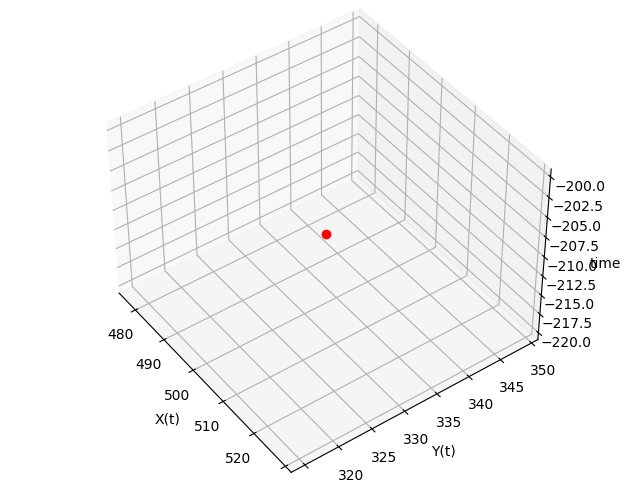

In [18]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
 

 
# ANIMATION FUNCTION
def func(num, dataSet, line, redDots):
    # NOTE: there is no .set_data() for 3 dim data...
    
    
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    redDots.set_data(dataSet[0:2, :num])    
    redDots.set_3d_properties(dataSet[2, :num]) 
    return line
 
''' 
# THE DATA POINTS
t = np.arange(0,20,0.5) # This would be the z-axis ('t' means time here)
x = np.cos(t)-1
y = 1/2*(np.cos(2*t)-1)

dataSet = np.array([x, y, t])
#print(dataSet)
numDataPoints = len(t)
'''
dev = serial_init(115200)

coord = []
    
while True:
    symbol = dev.read()
    if (symbol == b'*'):  
        for i in range(3):
            state = dev.readline()
            line = state.decode("utf-8")

            if (line == ''): 
                print("OK")
                break
            else: coord.append(int(line))
    else: continue
    
    if (line == ''): break
        
    print(coord)
    
    dataSet = np.array(coord)
    
    coord.clear()
    
# New DATA
#dataSet = np.array(coord)
numDataPoints = 3

 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
redDots = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='r', marker='o')[0] # For scatter plot
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet, line, redDots), interval=50, blit=False, repeat=False)
# line_ani.save(r'Animation.mp4')
 
plt.show()
dev.close()

In [19]:
while True:
    try:
        ser_bytes = ser.readline()
        
        data = str(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
        print(data)
    

SyntaxError: unexpected EOF while parsing (<ipython-input-19-1bf8182f25f1>, line 6)

In [4]:
dev = serial_init(115200)

coord = []

while True:
    
    state = dev.readline()
    if (state == b''): continue
    if(state == b'*'): break
    line = state.decode('utf-8')
    
    print('line = ', line)
    new = line.split(',')
    
    new_int = [int(x) for x in new]
    print('new_int = ', new_int)
    
#print('coord = ', coord)

'''    
while True:
    symbol = dev.read()
    if (symbol == b'*'):  
        for i in range(3):
            state = dev.readline()
            line = state.decode("utf-8")

            if (line == ''): 
                print("OK")
                break

            else: coord.append(int(line))
    else: continue
    
    if (line == ''): break
        
    print(coord)
    
    coord.clear()
'''


line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0, 0, 0]
line =  0,0,0

new_int =  [0

ValueError: invalid literal for int() with base 10: '\n'

In [13]:
a, b, c = [1,2,3]

<IPython.core.display.Javascript object>


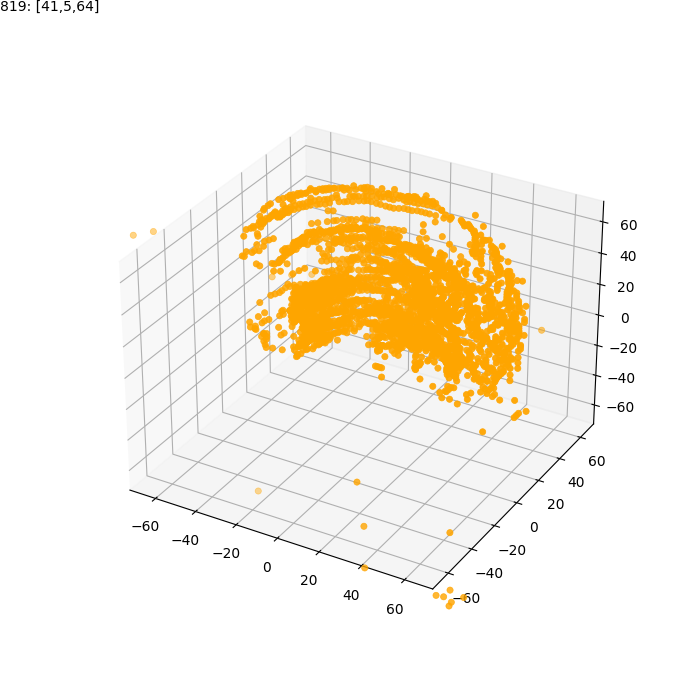

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
    
def update_lines(num):
    #dx, dy, dz = np.random.random((3,)) * 255 * 2 - 255  # replace this line with code to get data from serial line
    #todo----
    
    state = dev.readline()
    #print (state)
    if(state == b'*'): return
    if(state != b''): 
        line = (state.decode("utf-8")).split(',')
        dx, dy, dz = [int(item) for item in line]
        #print(dx,dy,dz)
        #todo----
        #dx, dy, dz = line_x, line_y, line_z
        #dx, dy, dz = coord[0], coord[1], coord[2]
        text.set_text("{:d}: [{:.0f},{:.0f},{:.0f}]".format(num, dx, dy, dz))  # for debugging
        x.append(dx)
        y.append(dy)
        z.append(dz)
        graph._offsets3d = (x, y, z)
        return graph,

x = []
y = []
z = []

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
#graph = ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
#x,y,z = [], [], []

graph = ax.scatter(x, y, z, color = 'orange', linewidth = 0.5)
text = fig.text(0, 1, "TEXT", va='top')  # for debugging

ax.set_xlim3d(-70, 70)
ax.set_ylim3d(-70, 70)
ax.set_zlim3d(-70, 70)

# Creating the Animation object
ani = animation.FuncAnimation(fig, update_lines, frames=1000, interval=1, blit=True) #blit = True
plt.show()
#dev.close()
#print('x = ', x)

In [11]:
dev.close()


In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
graph = ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
#x,y,z = [], [], []

graph = ax.scatter(x, y, z, color='orange')
text = fig.text(0, 1, "TEXT", va='top')  # for debugging

ax.set_xlim3d(-70, 70)
ax.set_ylim3d(-70, 70)
ax.set_zlim3d(-70, 70)

# Creating the Animation object
ani = animation.FuncAnimation(fig, update_lines, frames=200, interval=1, blit=True) #blit = True
plt.show()

<IPython.core.display.Javascript object>


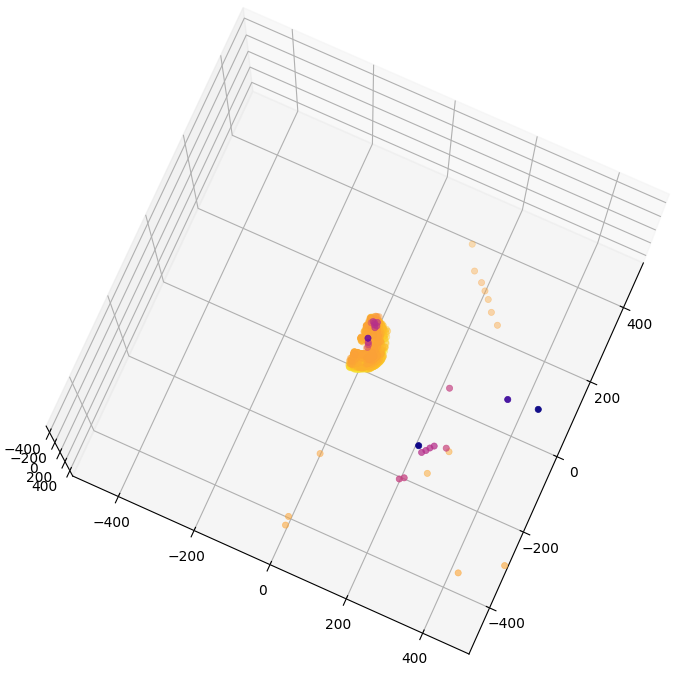

In [10]:
#X = np.asarray(x)
#Y = np.asarray(y)
#Z = np.asarray(z)

fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.scatter(x, y, z, c = z, cmap='plasma', linewidth = 0.5);
#ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');
ax.set_xlim3d(-500, 500)
ax.set_ylim3d(-500, 500)
ax.set_zlim3d(-500, 500)

plt.show()

In [24]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');
plt.show()

In [19]:
import numpy as np
from scipy import interpolate

N = 64
data = np.random.random((21, 10, N))
X = np.linspace(10., 15., 21)
Y = np.linspace(0.05, 1.85, 10)
Xnew = np.linspace(10., 15., 41)
Ynew = np.linspace(0.05, 1.85, 20)
datanew = np.empty((N, 41, 20))
for i0 in np.arange(N):
    f = interpolate.interp2d(X, Y, data[:,:,i0].T, kind='linear')
    datanew[i0] = f(Ynew,Xnew)
datanew = np.rollaxis(datanew, 0, 3)

In [17]:
from matplotlib.colors import LightSource

from matplotlib import cm
light = LightSource(90, 45)
illuminated_surface = light.shade(Z, cmap=cm.coolwarm)

NameError: name 'Z' is not defined

<IPython.core.display.Javascript object>


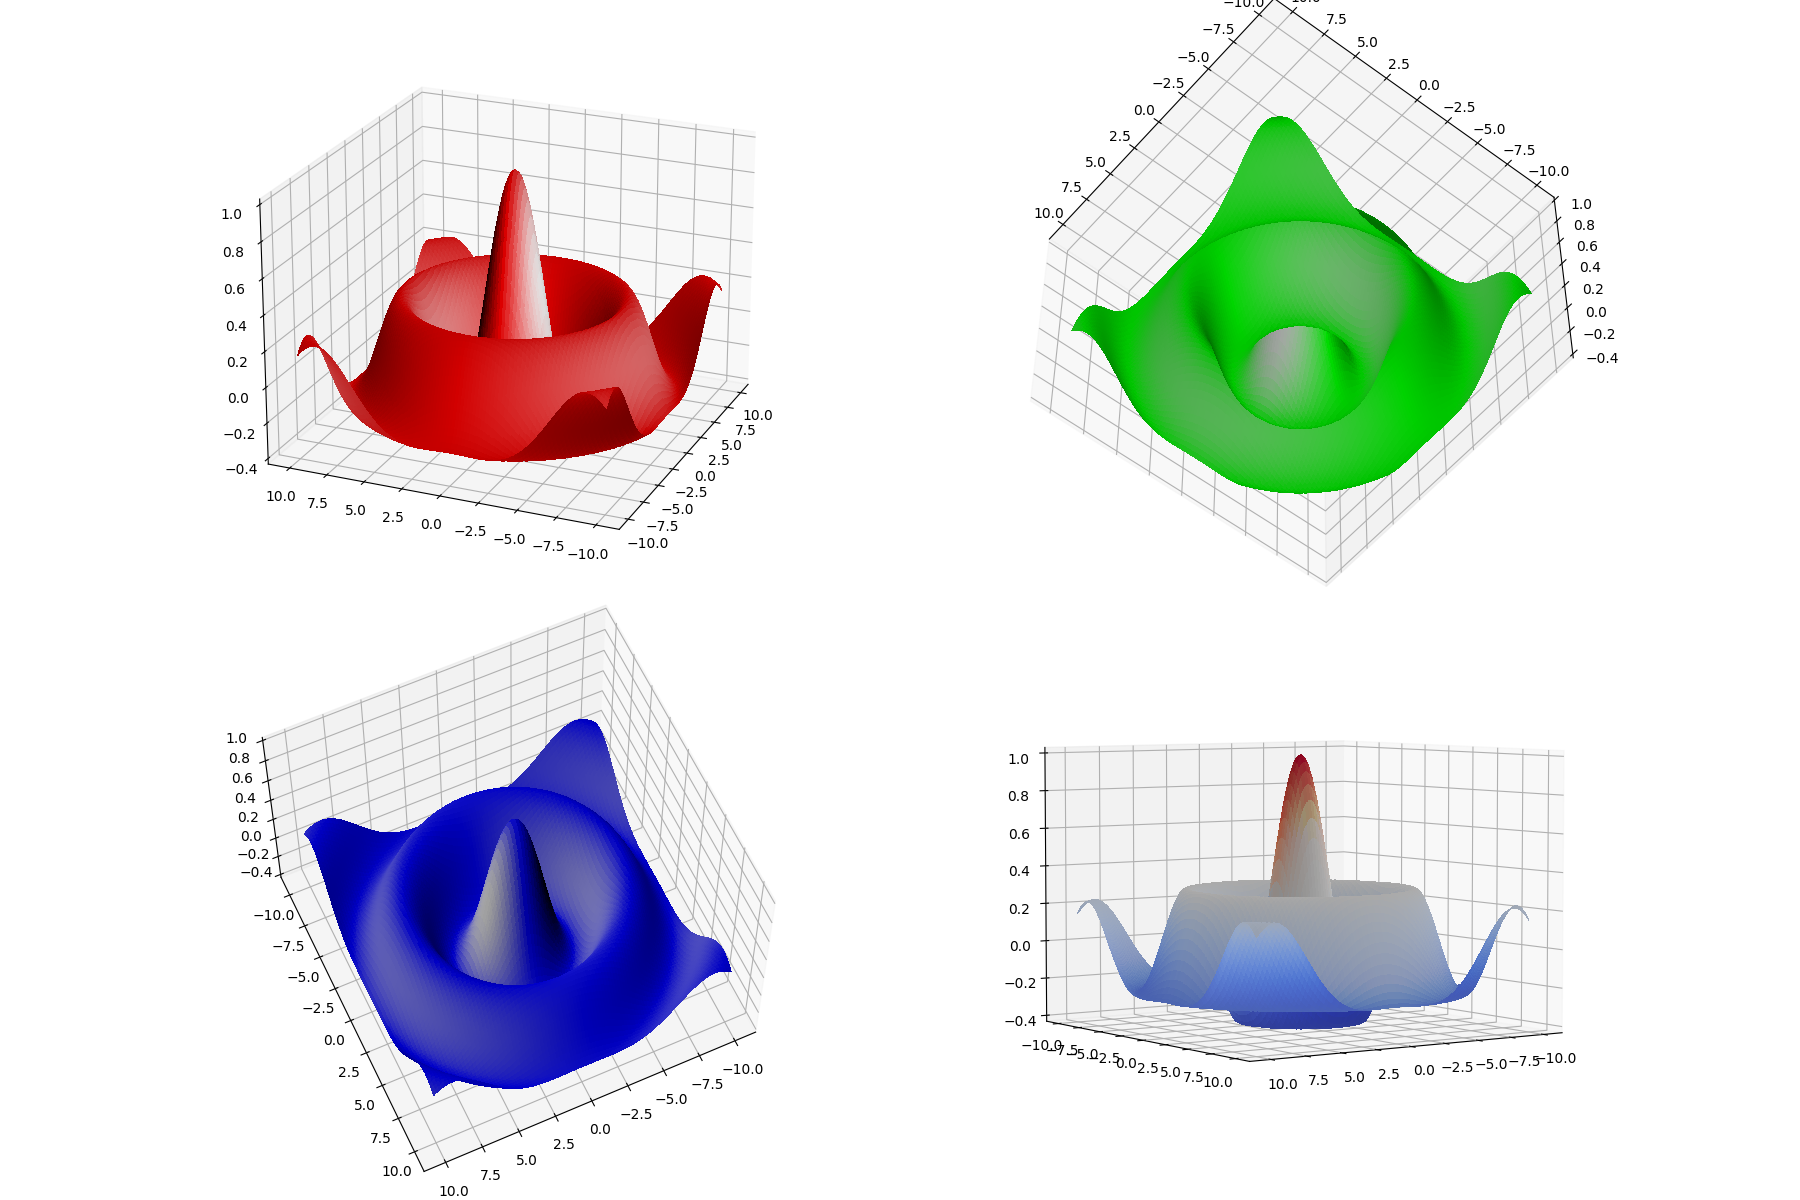

In [18]:
# =========================================================================
# shading.py
# Author:   Jesse M. Kinder
# Created:  2015 Jul 27
# Modified: 2015 Jul 31
# -------------------------------------------------------------------------
# Demonstrate shading of surface plots using Matplotlib's LightSource.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import Bessel function.
from scipy.special import jn

# Import colormaps.
from matplotlib import cm

# Import lighting object for shading surface plots.
from matplotlib.colors import LightSource

# Define grid of points.
points = np.linspace(-10, 10, 101)
X, Y = np.meshgrid(points, points)
R = np.sqrt(X**2 + Y**2)
Z = jn(0,R)

# Create an rgb array for single-color surfaces.
white = np.ones((Z.shape[0], Z.shape[1], 3))
red = white * np.array([1,0,0])
green = white * np.array([0,1,0])
blue = white * np.array([0,0,1])

# Set view parameters for all subplots.
azimuth = 45
altitude = 60

# Create empty figure.
fig = plt.figure(figsize=(18,12))

# -------------------------------------------------------------------------
# Generate first subplot.
# ------------------------------------------------------------------------- 
# Create a light source object for light from
# 0 degrees azimuth, 0 degrees elevation.
light = LightSource(0, 0)

# Generate face colors for a shaded surface using either
# a color map or the uniform rgb color specified above.

illuminated_surface = light.shade_rgb(red, Z)

# Create a subplot with 3d plotting capabilities.
# This command will fail if Axes3D was not imported.
ax = fig.add_subplot(2,2,1, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# -------------------------------------------------------------------------
# Repeat the commands above for the other three subplots, but use different
# illumination angles and colors.
# ------------------------------------------------------------------------- 
light = LightSource(90, 0)
illuminated_surface = light.shade_rgb(green, Z)

ax = fig.add_subplot(2,2,2, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(90, 45)
illuminated_surface = light.shade_rgb(blue, Z)

ax = fig.add_subplot(2,2,3, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(180, 45)
illuminated_surface = light.shade(Z, cmap=cm.coolwarm)

ax = fig.add_subplot(2,2,4, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
plt.tight_layout()
#plt.savefig('shading.png')


In [17]:
a = "54343|84|934"
x = a.split('|')
print (x)

new = [int(i) for i in x]

print (new)

#x.pop(1)
#print (x)
print (new[0])
type (new[0])
#strtoint
#type (x)

['54343', '84', '934']
[54343, 84, 934]
54343


int

In [280]:
str = "335"
v = int(str)
print (v)
type (v)

335


int